In [1]:
import cv2
import numpy as np
import scipy.optimize as opt
from tqdm import tqdm
from IPython.core.debugger import Tracer
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# %matplotlib inline
# %matplotlib notebook

In [24]:
def findCorrespondance( a , b):
    matching_list = []
    
    if (a == 1):
        with open("./Data/matching1.txt") as f:
            line_no = 1;
            print("File opened")
            for line in f:
                if line_no == 1:
                    start_index = line.find(':')
#                     print("start_index = ", start_index )
                    end_index = len(line)
#                     print("end_index = ", end_index)
                    line_no += 1;
                    nfeatures = line[start_index+2:end_index-1]
                    nfeatures = int(nfeatures)
#                     print("nfeatures = ",line[11:15])
        #         print("type of v(line) = ",type(line))
        #         print(line)
                else:
                    matching_list.append(line.rstrip('\n'))
    if (a == 2):
        with open("./Data/matching2.txt") as f:
            line_no = 1;
            print("File opened")
            for line in f:
                if line_no == 1:
                    start_index = line.find(':')
#                     print("start_index = ", start_index )
                    end_index = len(line)
#                     print("end_index = ", end_index)
                    line_no += 1;
                    nfeatures = line[11:15]
                    nfeatures = int(nfeatures)
#                     print("nfeatures = ",line[11:15])
        #         print("type of v(line) = ",type(line))
        #         print(line)
                else:
                    matching_list.append(line.rstrip('\n'))
                    
    if (a == 3):
        with open("./Data/matching3.txt") as f:
            line_no = 1;
            print("File opened")
            for line in f:
                if line_no == 1:
                    start_index = line.find(':')
#                     print("start_index = ", start_index )
                    end_index = len(line)
#                     print("end_index = ", end_index)
                    line_no += 1;
                    nfeatures = line[11:15]
                    nfeatures = int(nfeatures)
#                     print("nfeatures = ",line[11:15])
        #         print("type of v(line) = ",type(line))
        #         print(line)
                else:
                    matching_list.append(line.rstrip('\n'))
                    
    if (a == 4):
        with open("./Data/matching4.txt") as f:
            line_no = 1;
            print("File opened")
            for line in f:
                if line_no == 1:
                    start_index = line.find(':')
#                     print("start_index = ", start_index )
                    end_index = len(line)
#                     print("end_index = ", end_index)
                    line_no += 1;
                    nfeatures = line[11:15]
                    nfeatures = int(nfeatures)
#                     print("nfeatures = ",line[11:15])
        #         print("type of v(line) = ",type(line))
        #         print(line)
                else:
                    matching_list.append(line.rstrip('\n'))
                    
                    
    if (a == 5):
        with open("./Data/matching5.txt") as f:
            line_no = 1;
            print("File opened")
            for line in f:
                if line_no == 1:
                    start_index = line.find(':')
#                     print("start_index = ", start_index )
                    end_index = len(line)
#                     print("end_index = ", end_index)
                    line_no += 1;
                    nfeatures = line[11:15]
                    nfeatures = int(nfeatures)
#                     print("nfeatures = ",line[11:15])
        #         print("type of v(line) = ",type(line))
        #         print(line)
                else:
                    matching_list.append(line.rstrip('\n'))
                    
                    

    final_list = []
    for i in range(0,len(matching_list)):
        current_row = matching_list[i]
        splitStr = current_row.split();
        current_row = []
        for j in splitStr:
            current_row.append(float(j))
        final_list.append(np.transpose(current_row))

    output_list = []
    
    for i in range(0,len(final_list)):
        new_row = []
        current_row = final_list[i]
        current_row = current_row[1:len(current_row)]
#         print("len_current_row",len(current_row))
#         print("early Current Row = ",current_row)
#         current_row = current_row
        res = np.where(current_row == b)
#         if(res[0])
#         print("res = ",res)
#         print(len(res[0]))
        if(len(res[0]) != 0):
#             if(res[0][0] is not 0): 
#                 res = np.where(current_row == b)
#                 index = res[0][0]
#                 new_row.append(current_row[1])
#                 new_row.append(current_row[2])
#                 new_row.append(current_row[3])
#                 new_row.append(current_row[4])
#                 new_row.append(current_row[5])
#                 new_row.append(current_row[index+1])
#                 new_row.append(current_row[index+2])
#             else:
#             current_row = current_row[1:len(current_row)-1]
#             res = np.where(current_row == b)
            index = res[0][0]
#             print("index is = ",index)
            new_row.append(current_row[0])
            new_row.append(current_row[1])
            new_row.append(current_row[2])
            new_row.append(current_row[3])
            new_row.append(current_row[4])
            new_row.append(current_row[index+1])
            new_row.append(current_row[index+2])
                
        if (len(new_row) is not 0):
            output_list.append(np.transpose(new_row)) 
#     print("final List", final_list)
    matching_list = output_list
    print("Done extracting correspondance points. Format:R,G,B,u1,v1,u2,v2")
    return matching_list

#_________________________________________________________
matching_list = findCorrespondance(1,4)
pts1 = []
pts2 = []
for row in matching_list:
    pt1 = (row[3],row[4])
    pt2 = (row[5],row[6])
    pts1.append(pt1)
    pts2.append(pt2)
    
#_________________________________________________________


def estimate_fundamental_matrix(points_a, points_b):
    points_num = points_a.shape[0]
    A = []
    B = np.ones((points_num, 1))

    cu_a = np.sum(points_a[:, 0])/points_num
    cv_a = np.sum(points_a[:, 1])/points_num

    s = points_num/np.sum(((points_a[:, 0]-cu_a)**2 + (points_a[:, 1]-cv_a)**2)**(1/2))
    T_a =np.dot(np.array([[s, 0, 0], [0,s,0], [0,0,1]]), np.array([[1,0,-cu_a],[0,1,-cv_a],[0,0,1]]))

    points_a = np.array(points_a.T)
    points_a = np.append(points_a,B)

    points_a = np.reshape(points_a, (3,points_num))
    points_a = np.dot(T_a, points_a)
    points_a = points_a.T

    cu_b = np.sum(points_b[:,0])/points_num
    cv_b = np.sum(points_b[:,1])/points_num

    s = points_num/np.sum(((points_b[:,0]-cu_b)**2 + (points_b[:,1]-cv_b)**2)**(1/2))
    T_b =np.dot(np.array([[s,0,0], [0,s,0], [0,0,1]]), np.array([[1,0,-cu_b],[0,1,-cv_b],[0,0,1]]))

    points_b = np.array(points_b.T)
    points_b = np.append(points_b,B)

    points_b = np.reshape(points_b, (3,points_num))
    points_b = np.dot(T_b, points_b)
    points_b = points_b.T

    for i in range(points_num):
        u_a = points_a[i,0]
        v_a = points_a[i,1]
        u_b = points_b[i,0]
        v_b = points_b[i,1]
        A.append([u_a*u_b, v_a*u_b, u_b, u_a*v_b, v_a*v_b, v_b, u_a, v_a,1])

    _,_,v = np.linalg.svd(A)
    F = v[-1]

    F = np.reshape(F,(3,3)).T
    F = np.dot(T_a.T, F)
    F = np.dot(F, T_b)

    F = F.T
    U,S,V = np.linalg.svd(F)
    S = np.array([[S[0],0,0],[0,S[1],0],[0,0,0]])
    F = np.dot(U, S)
    F = np.dot(F, V)
    
    F = F/F[2,2]

    return F

def ransac_fundamental_matrix(matches_a, matches_b):
    matches_num = matches_a.shape[0]
    Best_count = 0

    for iter in range(500):
        sampled_idx = np.random.randint(0, matches_num, size = 8)
        F = estimate_fundamental_matrix(matches_a[sampled_idx, :], matches_b[sampled_idx, :])
        in_a = []
        in_b = []
        update = 0
        for i in range(matches_num):
            matches_aa = np.append(matches_a[i,:],1)
            matches_bb = np.append(matches_b[i,:],1)
            error = np.dot(matches_aa, F.T)
            error = np.dot(error, matches_bb.T)
            if abs(error) < 0.05:
                in_a.append(matches_a[i,:])
                in_b.append(matches_b[i,:])
                update +=1

        if update > Best_count:
            Best_count = update
            best_F = F
            inliers_a = in_a
            inliers_b = in_b

    inliers_a = np.array(inliers_a)
    inliers_b = np.array(inliers_b)

    return best_F, inliers_a, inliers_b

def EssentialMatrixFromFundamentalMatrix(F,K):
    
    
    E = np.dot(K.T, np.dot(F, K))
    U, S, V_T = np.linalg.svd(E)
    
    E = np.dot(U, np.dot(np.diag([1, 1, 0]), V_T))
    return E

def EstimateCameraPose(E, K):
    
    U,S,V_T = np.linalg.svd(E)
    W = np.array([[0, -1, 0],[1, 0, 0],[0, 0, 1]])
    
    print("E svd U", U)
    print("E svd S", S)
    print("E svd U[:, 2]", U[:, 2])
    R = []
    C = []
    R.append(np.dot(U, np.dot(W, V_T)))
    R.append(np.dot(U, np.dot(W, V_T)))
    R.append(np.dot(U, np.dot(W.T, V_T)))
    R.append(np.dot(U, np.dot(W.T, V_T)))
    C.append(U[:, 2])
    C.append(- U[:, 2])
    C.append(U[:, 2])
    C.append(-U[:, 2])
    
    for i in range(4):
        if(np.linalg.det(R[i])<0):
            R[i] = -R[i]
            C[i] = -C[i]
    
    return R,C

def skew(x):
    return np.array([[0, -x[2], x[1]],
                     [x[2], 0, x[0]],
                     [x[1], x[0], 0]])


def LinearTriangulation( K, C1, R1, C2, R2, x1, x2 ):

    I = np.identity(3)
    sz = x1.shape[0]
    C2 = np.reshape(C2,(3,1))
    P1 = np.dot(K, np.dot(R1, np.hstack((I, -C1))))
    P2 = np.dot(K, np.dot(R2, np.hstack((I, -C2))))
    
#     print(P2.shape)
    X1 = np.hstack((x1, np.ones((sz, 1))))
    X2 = np.hstack((x2, np.ones((sz, 1))))


    X = np.zeros((sz, 3))

    for i in range(sz):
        skew1 = skew(X1[i, :])
        skew2 = skew(X2[i, :])
        A = np.vstack((np.dot(skew1,P1),np.dot(skew2,P2)))
        _,_,v = np.linalg.svd(A)
        x = v[:,-1] / v[-1,-1]
        x = np.reshape(x,(len(x),-1))
        X[i,:] = x[0:3].T

    return X

def DisambiguateCameraPose( Cset, Rset, Xset):
    best = 0
    for i in range(4):
        
#         Cset[i] = np.reshape(Cset[i],(-1,-1))
        N = Xset[i].shape[0]
        n = 0
        for j in range(N):
            if ((np.dot(Rset[i][2, :],(Xset[i][j, :] - Cset[i])) > 0) and Xset[i][j, 2] >= 0):
                n = n+1
        if n > best:
            C = Cset[i]
            R = Rset[i]
            X = Xset[i]
            best = n

    return X, R, C

File opened
Done extracting correspondance points. Format:R,G,B,u1,v1,u2,v2


In [28]:
K = np.array([[568.996140852,0,643.21055941],
     [0, 568.988362396, 477.982801038],
     [0, 0, 1]])
best_F, inliers_a, inliers_b = ransac_fundamental_matrix(np.int32(pts1),np.int32(pts2))
E = EssentialMatrixFromFundamentalMatrix(best_F,K)
print(E,best_F)
R_set,C_set = EstimateCameraPose(E,K)

(array([[ 0.05581521, -0.7056183 , -0.05191068],
       [ 0.74830554, -0.03240967,  0.66116321],
       [ 0.01005148, -0.69972804, -0.09178251]]), array([[ 1.84703311e-06, -2.53878052e-05,  9.80260713e-03],
       [ 2.75318679e-05, -8.55838667e-07, -3.43091125e-03],
       [-1.42542182e-02,  2.40308098e-03,  1.00000000e+00]]))
('E svd U', array([[-0.0743755 ,  0.70581551, -0.70448048],
       [-0.99714035, -0.06212467,  0.04303066],
       [-0.01339391,  0.70566635,  0.70841768]]))
('E svd S', array([1.0000000e+00, 1.0000000e+00, 3.3881734e-18]))
('E svd U[:, 2]', array([-0.70448048,  0.04303066,  0.70841768]))


In [29]:
X = []
for i in range(4):
    X.append(LinearTriangulation(K,np.zeros((3,1)),np.identity(3),C_set[i].T,R_set[i],np.int32(pts1),np.int32(pts2)))
    

In [32]:
R_set

[array([[-0.06407128,  0.06817686, -0.99561377],
        [ 0.0181815 , -0.99741831, -0.06947047],
        [-0.99777969, -0.02255281,  0.06266631]]),
 array([[-0.06407128,  0.06817686, -0.99561377],
        [ 0.0181815 , -0.99741831, -0.06947047],
        [-0.99777969, -0.02255281,  0.06266631]]),
 array([[ 0.99528943,  0.0824772 , -0.05095544],
        [-0.07506162,  0.98821615,  0.13339639],
        [ 0.06135715, -0.12894322,  0.98975196]]),
 array([[ 0.99528943,  0.0824772 , -0.05095544],
        [-0.07506162,  0.98821615,  0.13339639],
        [ 0.06135715, -0.12894322,  0.98975196]])]

In [33]:
C_set

[array([-0.70448048,  0.04303066,  0.70841768]),
 array([ 0.70448048, -0.04303066, -0.70841768]),
 array([-0.70448048,  0.04303066,  0.70841768]),
 array([ 0.70448048, -0.04303066, -0.70841768])]

In [12]:
best_F

array([[ 1.59827187e-06, -2.30345998e-05,  9.05060978e-03],
       [ 2.53981597e-05, -8.95446766e-07, -3.54387655e-03],
       [-1.32382193e-02,  2.56584577e-03,  1.00000000e+00]])

In [34]:
X_new, R, C = DisambiguateCameraPose(C_set, R_set, X)
X_new

array([[ -1.93519416, -10.52350292,   4.95181995],
       [ -1.93519416, -10.52350292,   4.95181995],
       [ -1.86861811, -10.14204735,   4.83532842],
       ...,
       [  2.77421365,   8.38710753,  -2.23900462],
       [  3.11329257,   9.58175511,  -3.20384191],
       [  3.13933805,   9.45059871,  -3.28685154]])

In [35]:
C

array([ 0.70448048, -0.04303066, -0.70841768])

In [8]:
# X1_4
X1_2 = X_new 

In [9]:
all_X_new = np.vstack((all_X_new,X_new))

NameError: name 'all_X_new' is not defined

In [37]:
all_X_new = X_new

In [ ]:
%matplotlib inline

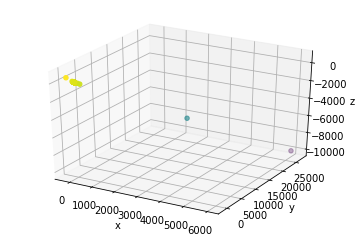

In [38]:


fig = plt.figure()
ax = plt.axes(projection='3d')
# ax = plt.axes
# Data for three-dimensional scattered points
ax.scatter3D(all_X_new[:,0], all_X_new[:,1], all_X_new[:,2], c=all_X_new[:,2], cmap='viridis');  #viridis
# plt.scatter(all_X_new[:,0], all_X_new[:,2], c=all_X_new[:,2], cmap='viridis');  #viridis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

(-15, 15)

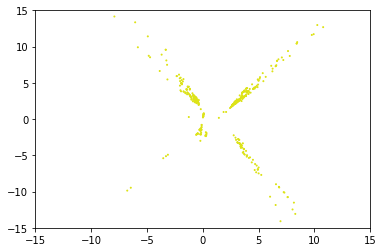

In [52]:


# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax = plt.axes
# Data for three-dimensional scattered points
# ax.scatter3D(all_X_new[:,0], all_X_new[:,1], all_X_new[:,2], c=all_X_new[:,2], cmap='viridis');  #viridis
plt.scatter(all_X_new[:,0], all_X_new[:,2], c=all_X_new[:,2], cmap='viridis',s = 1);  #viridis
# plt.set_xlabel('x')
# ax.set_ylabel('y')
# plt.set_ylabel('z');
axes = plt.gca()
axes.set_xlim([-15,15])
axes.set_ylim([-15,15])


In [ ]:
def NonLinearTriangulation(K,x1,x2,X_init,R1,C1,R2,C2):
    sz = x1.shape[0]
    print(R2)
    print(C2)
    assert x1.shape[0] == x2.shape[0] == X_init.shape[0],"2D-3D corresspondences have different shape "
    X = np.zeros((sz,3))

    init = X_init.flatten()
#     Tracer()()
    optimized_params = opt.least_squares(fun=minimizeFunction, x0=init,method="dogbox", args=[K,x1,x2,R1,C1,R2,C2])
 
    X = np.reshape(optimized_params.x,(sz,3))


    return X


def minimizeFunction(init,K,x1,x2,R1,C1,R2,C2):

    

    sz = x1.shape[0]
    X = np.reshape(init,(sz,3))

    I = np.identity(3)
    C2 = np.reshape(C2,(3,-1))
    
    X = np.hstack((X, np.ones((sz,1))))

    P1 = np.dot(K, np.dot(R1, np.hstack((I, -C1))))
    P2 = np.dot(K, np.dot(R2, np.hstack((I, -C2))))
    
    error1 = 0
    error2 = 0
    error = []
#     for i in range(sz):
#         u1 = np.divide((np.dot(P1[0,:],X[i].T).T) , (np.dot(P1[2,:],X[i].T).T))
#         v1 = np.divide((np.dot(P1[1,:],X[i].T).T) , (np.dot(P1[2,:],X[i].T).T))
#         u2 = np.divide((np.dot(P2[0,:],X[i].T).T) , (np.dot(P2[2,:],X[i].T).T))
#         v2 = np.divide((np.dot(P2[1,:],X[i].T).T) , (np.dot(P2[2,:],X[i].T).T))
        
#         error1 += ((x1[i,0] - u1) + (x1[i,1] - v1))
#         error2 += ((x2[i,0] - u2) + (x2[i,1] - v2))
    
    
    
#     error = error1+error2

    u1 = np.divide((np.dot(P1[0,:],X.T).T) , (np.dot(P1[2,:],X.T).T))
    v1 = np.divide((np.dot(P1[1,:],X.T).T) , (np.dot(P1[2,:],X.T).T))
    u2 = np.divide((np.dot(P2[0,:],X.T).T) , (np.dot(P2[2,:],X.T).T))
    v2 = np.divide((np.dot(P2[1,:],X.T).T) , (np.dot(P2[2,:],X.T).T))
    
#     print(u1.shape,x1.shape)
    assert u1.shape[0] == x1.shape[0],"shape not matched"

    error1 = ((x1[:,0] - u1) + (x1[:,1] - v1))
    error2 = ((x2[:,0] - u2) + (x2[:,1] - v2))
#     print(error1.shape)
    error = sum(error1,error2)
    
    return sum(error)

In [ ]:
X_final = NonLinearTriangulation(K,np.float32(pts1),np.float32(pts2),X_new,np.identity(3),np.zeros((3,1)),R,C)
X_final

NameError: name 'X_final' is not defined

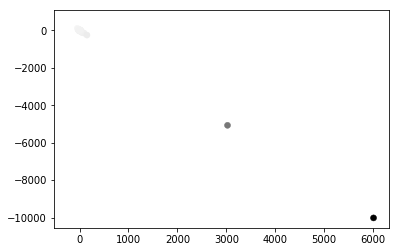

In [40]:
plt.scatter(all_X_new[:,0], all_X_new[:,2], c=all_X_new[:,2], cmap='gray', linewidth=0.5);  #viridis

plt.scatter(X_final[:,0], X_final[:,2], c=X_final[:,2], cmap='Greens', linewidth=0.5);  #viridis
# plt.set_xlabel('x')
# ax.set_ylabel('y')
# plt.set_ylabel('z');
axes = plt.gca()
axes.set_xlim([-20,20])
axes.set_ylim([-20,20])